In [1]:
import sys
COMP_NAME = "icecube-neutrinos-in-deep-ice"
sys.path.append(f"/home/anjum/kaggle/{COMP_NAME}/")

import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import pairwise_distances
from torchmetrics.functional import pairwise_euclidean_distance


from src.config import INPUT_PATH, OUTPUT_PATH

In [2]:
batch = pd.read_parquet(INPUT_PATH / "train" / "batch_1.parquet")
event_24 = batch.loc[24]
event_24

,sensor_id,time,charge,auxiliary
event_id,,,,
24,3918,5928,1.325,True
24,4157,6115,1.175,True
24,3520,6492,0.925,True
24,5041,6665,0.225,True
24,2948,8054,1.575,True
...,...,...,...,...
24,3452,17812,0.725,True
24,48,18053,0.975,True
24,3267,18095,1.125,True


In [3]:
event_24["sensor_id"].value_counts()

557     4
5057    3
3050    2
3496    2
558     2
3609    2
3267    2
3520    2
1970    2
3276    1
4831    1
613     1
554     1
560     1
4571    1
3699    1
300     1
2421    1
3438    1
2261    1
3115    1
4528    1
2448    1
3289    1
4904    1
3452    1
48      1
975     1
3918    1
973     1
972     1
5041    1
2948    1
860     1
2440    1
1743    1
2977    1
5059    1
3161    1
2959    1
1397    1
3387    1
1583    1
1940    1
1241    1
1405    1
4157    1
553     1
104     1
Name: sensor_id, dtype: int64

In [4]:
data = torch.load(INPUT_PATH / "train_events" / "batch_1" / "event_24.pt")
data

Data(x=[61, 9], y=[2], n_pulses=61)

In [5]:
xyz = data.x[:, :3].numpy()
xyz

array([[ 0.60682   ,  0.67128   ,  0.41316   ],
       [-0.2909    ,  0.74847996,  0.42545998],
       [ 1.01054   ,  0.51576   , -0.3492    ],
       [ 1.01054   ,  0.51576   , -0.3492    ],
       [-0.01936   , -0.159     ,  0.362     ],
       [ 1.15274   ,  0.34184   ,  0.71576   ],
       [-0.58132   , -0.61476   ,  0.32722   ],
       [-1.05326   , -0.0312    , -0.35634   ],
       [ 1.00086   , -0.1169    ,  0.90158004],
       [-0.6272    ,  0.47488   ,  0.69602   ],
       [-0.6272    ,  0.47488   ,  0.69602   ],
       [-0.01936   , -0.159     , -0.41094   ],
       [-0.01936   , -0.159     , -0.41094   ],
       [-0.01936   , -0.159     , -0.41094   ],
       [ 1.15274   ,  0.34184   , -0.27144   ],
       [-0.01936   , -0.159     , -0.43898   ],
       [ 1.01054   ,  0.51576   ,  0.4678    ],
       [ 1.01054   ,  0.51576   ,  0.4678    ],
       [-0.46989998,  0.28088   , -0.39558   ],
       [ 1.15274   ,  0.34184   ,  0.34129998],
       [-0.4913    , -0.38098   ,  0.424

In [6]:
t, idx = torch.sort(data.x[:, 3])
idx

tensor([ 0,  1,  2,  4,  5,  6,  7,  8,  9, 11, 12, 14, 15, 16, 18, 19, 20, 21,
        23, 24, 25, 26, 27, 29, 33, 30, 28, 31, 32, 34, 36, 37, 38, 39, 40, 41,
        42, 43, 44, 45,  3, 46, 47, 48, 49, 50, 10, 51, 13, 52, 17, 53, 54, 35,
        55, 22, 56, 57, 58, 59, 60])

In [7]:
t

tensor([-0.1357, -0.1295, -0.1169, -0.1112, -0.0649, -0.0625, -0.0572, -0.0507,
        -0.0476, -0.0440, -0.0426, -0.0418, -0.0044, -0.0008,  0.0086,  0.0214,
         0.0283,  0.0324,  0.0341,  0.0362,  0.0406,  0.0472,  0.0734,  0.0735,
         0.0738,  0.0742,  0.0780,  0.0792,  0.0812,  0.0857,  0.0869,  0.0908,
         0.0924,  0.0924,  0.0939,  0.1027,  0.1087,  0.1334,  0.1402,  0.1428,
         0.1508,  0.1533,  0.1736,  0.1781,  0.1867,  0.1878,  0.1884,  0.1974,
         0.1989,  0.2005,  0.2094,  0.2256,  0.2295,  0.2391,  0.2399,  0.2585,
         0.2604,  0.2684,  0.2698,  0.2701,  0.3010])

In [8]:
data.x = data.x[idx]

In [9]:
aux = data.x[:, 6]
aux

tensor([ 0.5000,  0.5000,  0.5000,  0.5000,  0.5000,  0.5000,  0.5000,  0.5000,
         0.5000,  0.5000,  0.5000,  0.5000, -0.5000,  0.5000,  0.5000,  0.5000,
         0.5000,  0.5000,  0.5000,  0.5000,  0.5000,  0.5000, -0.5000, -0.5000,
         0.5000, -0.5000, -0.5000, -0.5000, -0.5000,  0.5000, -0.5000, -0.5000,
        -0.5000,  0.5000, -0.5000, -0.5000, -0.5000,  0.5000,  0.5000,  0.5000,
         0.5000,  0.5000,  0.5000,  0.5000,  0.5000,  0.5000,  0.5000,  0.5000,
         0.5000,  0.5000,  0.5000,  0.5000,  0.5000,  0.5000,  0.5000,  0.5000,
         0.5000,  0.5000,  0.5000,  0.5000,  0.5000])

In [10]:
mat = pairwise_distances(xyz[idx])
mat.shape

(61, 61)

In [11]:
from torchmetrics.functional import pairwise_euclidean_distance

mat2 = pairwise_euclidean_distance(data.x[:, :3])

In [12]:
mat[:4, :4]

array([[0.        , 0.9011172 , 0.87656665, 1.0411934 ],
       [0.9011172 , 0.        , 1.5323194 , 0.9493582 ],
       [0.87656665, 1.5323194 , 0.        , 1.4219003 ],
       [1.0411934 , 0.9493582 , 1.4219003 , 0.        ]], dtype=float32)

In [13]:
mat2[:4, :4]

tensor([[0.0000, 0.9011, 0.8766, 1.0412],
        [0.9011, 0.0000, 1.5323, 0.9494],
        [0.8766, 1.5323, 0.0000, 1.4219],
        [1.0412, 0.9494, 1.4219, 0.0000]])

In [14]:
# Data objects no not preserve order, so need to sort by time
t, indices = torch.sort(data.x[:, 3])
data.x = data.x[indices]

xyz = data.x[:, :3]

n_nodes = xyz.shape[0]
mat = pairwise_euclidean_distance(xyz) + torch.eye(data.n_pulses) * 1000
mat = (mat - 0.5) / 0.5
prev = []

for i in range(data.n_pulses):
    masked_mat = mat[: i + 1, i]
    if i == 0:
#         prev.append([0])
        prev.append([0, 0])
    else:
#         prev.append([masked_mat[i].min()])

        idx = torch.argmin(masked_mat)
        d = masked_mat[idx]
        t_delta = (t[i] - t[idx] - 0.1) / 0.1
        prev.append([d, t_delta])

prev = torch.tensor(prev, dtype=torch.float32)

# torch.cat([dists.view(-1, 1), times.view(-1, 1), aux.view(-1, 1)], dim=-1)
prev

tensor([[ 0.0000,  0.0000],
        [ 0.8022, -0.9377],
        [ 0.7531, -0.8120],
        [ 0.8987, -0.8167],
        [ 0.4116, -0.2913],
        [ 0.4488, -0.5137],
        [ 1.0303, -0.9467],
        [ 0.0354, -0.8587],
        [ 0.0221, -0.1810],
        [ 0.5459, -0.3283],
        [-1.0000, -0.9857],
        [-0.5245, -0.2483],
        [-0.9439, -0.6040],
        [-0.3308, -0.3593],
        [ 0.2597, -0.4737],
        [-0.4844, -0.7780],
        [-0.4627, -0.0920],
        [ 0.1085, -0.1037],
        [-0.1643,  0.6983],
        [-0.3425,  0.4733],
        [-0.4579, -0.8770],
        [ 0.5654, -0.1103],
        [ 0.0621, -0.6280],
        [-0.9319, -0.9983],
        [-0.4553, -0.5450],
        [-1.0000, -0.9930],
        [-1.0000, -0.9540],
        [-1.0000, -0.9430],
        [-1.0000, -0.9233],
        [-0.1525,  0.4290],
        [-0.7277, -0.8663],
        [-0.4931, -0.9613],
        [-0.9319, -0.9833],
        [ 0.0050, -0.5477],
        [-0.8638, -0.9850],
        [-0.8638, -0

In [24]:
# Data objects no not preserve order, so need to sort by time
t, indices = torch.sort(data.x[:, 3])
data.x = data.x[indices]

xyz = data.x[:, :3]

n_nodes = xyz.shape[0]
mat = pairwise_euclidean_distance(xyz) + torch.triu(torch.ones_like(mat)) * 1000


dists, idx = mat.min(1)
dists = (dists - 0.5) / 0.5
t_delta = (t - t[idx] - 0.1) / 0.1

prev = torch.stack([dists, t_delta], dim=-1)
prev[0] = 0

prev

tensor([[ 0.0000,  0.0000],
        [ 0.8022, -0.9377],
        [ 0.7531, -0.8120],
        [ 0.8987, -0.8167],
        [ 0.4116, -0.2913],
        [ 0.4488, -0.5137],
        [ 1.0303, -0.9467],
        [ 0.0354, -0.8587],
        [ 0.0221, -0.1810],
        [ 0.5459, -0.3283],
        [-1.0000, -0.9857],
        [-0.5245, -0.2483],
        [-0.9439, -0.6040],
        [-0.3308, -0.3593],
        [ 0.2597, -0.4737],
        [-0.4844, -0.7780],
        [-0.4627, -0.0920],
        [ 0.1085, -0.1037],
        [-0.1643,  0.6983],
        [-0.3425,  0.4733],
        [-0.4579, -0.8770],
        [ 0.5654, -0.1103],
        [ 0.0621, -0.6280],
        [-0.9319, -0.9983],
        [-0.4553, -0.5450],
        [-1.0000, -0.9930],
        [-1.0000, -0.9540],
        [-1.0000, -0.9430],
        [-1.0000, -0.9233],
        [-0.1525,  0.4290],
        [-0.7277, -0.8663],
        [-0.4931, -0.9613],
        [-0.9319, -0.9833],
        [ 0.0050, -0.5477],
        [-0.8638, -0.9850],
        [-0.8638, -0

In [25]:
dists = prev[:, 0]

(array([18.,  1., 14.,  6.,  6.,  5.,  2.,  4.,  3.,  2.]),
 array([-1.        , -0.79697055, -0.59394109, -0.39091167, -0.18788223,
         0.01514721,  0.21817665,  0.42120609,  0.62423551,  0.82726496,
         1.03029442]),
 <BarContainer object of 10 artists>)

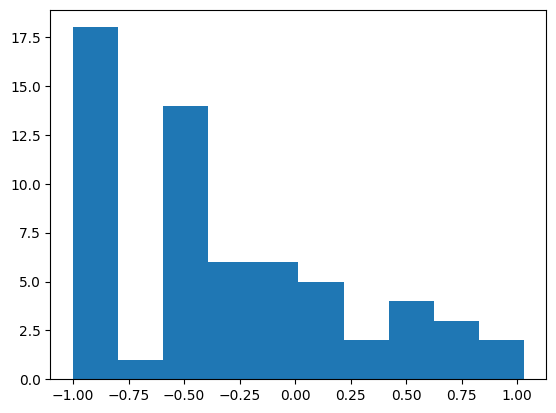

In [26]:
plt.hist(dists)

(array([22.,  7.,  9.,  3.,  8.,  1.,  4.,  3.,  2.,  2.]),
 array([-1.        , -0.67000002, -0.34      , -0.01000001,  0.31999999,
         0.64999998,  0.97999996,  1.30999994,  1.63999999,  1.96999991,
         2.29999995]),
 <BarContainer object of 10 artists>)

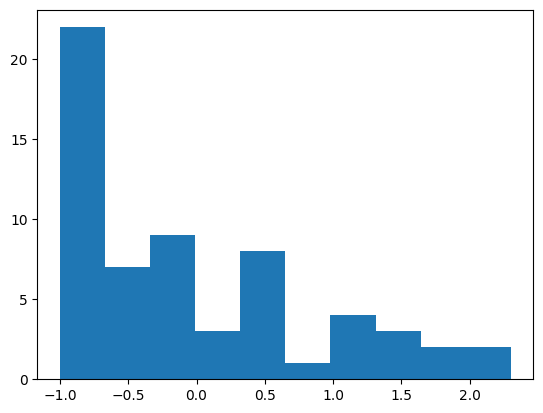

In [27]:
plt.hist(t_delta)

In [18]:
dists = np.array(dists)

dists.mean()

32.439365

In [19]:
times.mean(), times.std()

NameError: name 'times' is not defined

In [ ]:
norm_dists = (dists - 0.5) / 0.5
norm_dists

In [ ]:
norm_times = (times - 0.1) / 0.1
norm_times

In [ ]:
plt.hist(norm_dists)

In [ ]:
plt.hist(norm_times)

In [ ]:
t, indices = torch.sort(data.x[:, 3])  # Data objects no not preserve order
data.x = data.x[indices]

t_norm = 2 * (t - t.min()) / (t.max() - t.min()) - 1
t_norm

In [ ]:
charge = data.x[:, 4]
cum_charge = torch.cumsum(10 ** (3 * charge), 0)


charge_norm = 2 * (cum_charge - cum_charge.min()) / (cum_charge.max() - cum_charge.min()) - 1
charge_norm

In [ ]:
charge

In [ ]:
plt.plot(t_norm.numpy())

In [ ]:
plt.plot(charge_norm.numpy())